# Astro 8030 HW4
## Mary Kaldor
## December 3, 2024

### Problem 1b
#### Introduce a dimensionless variable $x = h\nu/kT$. Write the expression $\frac{1}{\rho\kappa_{\nu}} \frac{\partial B_{\nu}}{\partial T}$ for free-free emisison in terms of $x: const \times \rho^{\alpha} T^{\beta} f(x)$ and plot the resulting function $f(x)$. Use this plot to argue that the Rosseland mean opacity is detemined mainly by the frequency range when $\nu$ is a few times $kT/h$.

Import block

In [1]:
import astropy
import numpy as np
import matplotlib.pyplot as plt
import scipy
import astropy.constants as const
import astropy.units as u

Create x array of 99 points (avoid having a value at 0 -- $f(x)$ will be undefined!) ranging from -5 (arbitrary value $<0$) to 20 (some value larger than "a few", which is the area we'd like to investigate).

In [2]:
x = np.linspace(-5, 20, 99)

Define a function $f(x)$ based off written derivation, attached to this homework.

In [3]:
def f(x):
    numerator = (x**7)*(np.e**x)
    denominator = (1-(np.e**(-x)))*(((np.e**x)-1)**2)
    func = numerator/denominator
    return func

Plug in x array to calculate values of f for all x.

In [4]:
f = f(x)

Plot f(x) against x to investigate what happens with an input value of x of "a few".

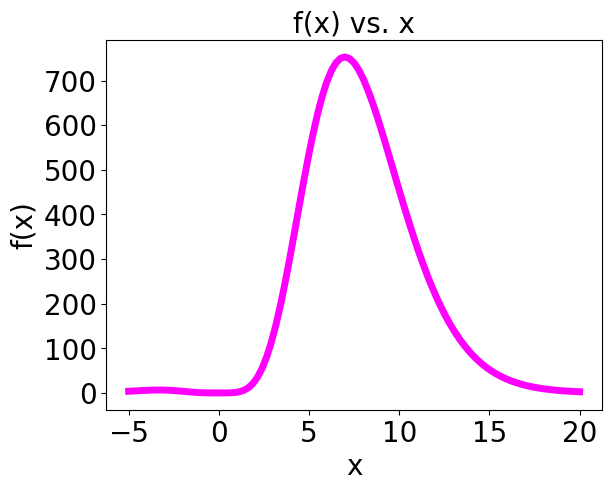

In [5]:
plt.plot(x, f, color="magenta", linewidth=5)
plt.xlabel("x", fontsize=20)
plt.ylabel("f(x)", fontsize=20)
plt.title("f(x) vs. x", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

f(x) is most impacted by the values when $\nu$ is a few times $kT/h$ (as in $\nu \times kT/h = x = a few)$.

### Problem 2a
#### Download the OPAL opacity table from Brightspace for solar composition stars (X = 0.7, Y = 0.28, Z = 0.02). The table lists the log of the total opacity as a function of logT (rows) for different values of logR (columns). Note: R is not radius, but a quantity that is related to the density and temperature as follows: $R = \rho/(T/10^6K)^3$. The first column lists values of logT, the first row lists values of logR , and all other values are log of opacity. The bottom right corner of the table was empty so I have filled it with values of -99999. Use this table to plot the opacity as a function of logT for the following values of log R : -8, -3.5, -0.5 (put the three curves on the same plot).

Grab data

In [6]:
opacity = np.genfromtxt("./opacity_table.dat")
logt = opacity[:,0]
logr = opacity[0]

Find where R equals the values we're interested in

In [7]:
idx8 = np.where(logr==-8.0)[0]
idx35 = np.where(logr==-3.5)[0]
idx05 = np.where(logr==-0.5)[0]

Pull data at these indices

In [8]:
op8log = opacity[:,idx8]
op35log = opacity[:,idx35]
op05log = opacity[:,idx05]

Take it out of log space so that the log plot makes sense

In [9]:
op8 = 10**(op8log)
op35 = 10**(op35log)
op05 = 10**(op05log)

Plot!

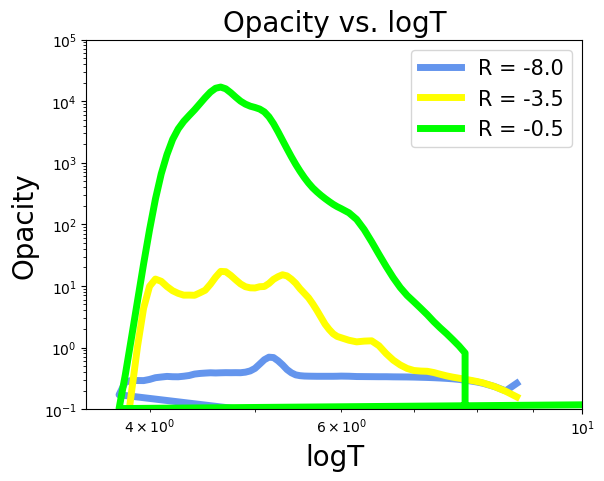

In [10]:
plt.loglog(logt, op8, label="R = -8.0", color="cornflowerblue", linewidth=5)
plt.loglog(logt, op35, label="R = -3.5", color="yellow", linewidth=5)
plt.loglog(logt, op05, label="R = -0.5", color="lime", linewidth=5)
plt.legend(fontsize=15)
plt.xlim(3.5,10)
plt.ylim(1e-1,1e5)
plt.xlabel("logT",fontsize=20)
plt.ylabel("Opacity",fontsize=20)
plt.title("Opacity vs. logT",fontsize=20)
plt.show()

### Problem 2b
#### Use the approximations for the opacity due to different sources: electron scattering, free-free absorption, bound-free absorption, and H-opacity (equations 4.60, 4.64, 4.63, and 4.65 in HKT) to calculate the total opacity as a function of temperature for these same values of logR (since logR depends on temperature as well as density, you will have to find the appropriate value of density for each value of temperature). You can simply add the first three opacities, but the H-opacity takes over when it becomes smaller than the other three. You can approximate the total opacity as $\kappa_{tot} = ((\kappa_{H^-})^{-1} + (\kappa_{e}+\kappa_{ff}+\kappa_{bf})^{-1})^{-1}$. Plot your approximation for the total opacity over your points from the opacity table to see how good (or poor) the approximations are.

Election scattering is stagnant, based off hydrogen composition

In [11]:
ke = 0.2*(1+0.7)

Definte a function that takes R and T and calculates a rho

In [12]:
def R_to_rho(R, T):
    rho = R*((T/1e6)**3)
    return rho

Free-free opacity

In [13]:
def kff(R, T):
    kff = 4e22*(0.7+0.28)*(1+0.7)*(R_to_rho(R, T))*(T**(-3.5))
    return kff

Bound-free opacity

In [14]:
def kbf(R, T):
    kbf = 4e25*(0.02)*(1+0.7)*(R_to_rho(R, T))*(T**(-3.5))
    return kbf

H- opacity

In [15]:
def kh(R, T):
    kh = 2.5e-31*(0.02/0.02)*((R_to_rho(R, T))**(1/2))*(T**9)
    return kh

Total opacity

In [16]:
def ktot(R, T):
    ktot = (((kh(R, T))**(-1))+((ke+(kff(R, T))+(kbf(R, T)))**(-1)))**(-1)
    return ktot

Get rid of the 9999 before doing the math itself (avoiding multiplying, dividing, or plotting infinity $\ddot\smile$ )

In [17]:
R = 10**logr[1:]
T = 10**logt[1:]

Grab R data with new indices after getting rid of the 9999

In [18]:
R8 = R[idx8-1]
R35 = R[idx35-1]
R05 = R[idx05-1]

Calculate total opacity for these values of R at all temperatures

In [19]:
ktot8 = [ktot(R8, temp) for temp in T]
ktot35 = [ktot(R35, temp) for temp in T]
ktot05 = [ktot(R05, temp) for temp in T]

Plot and compare! Light colors correspond to true opacities from the table, while their darker counterparts correpond to my estimated values.

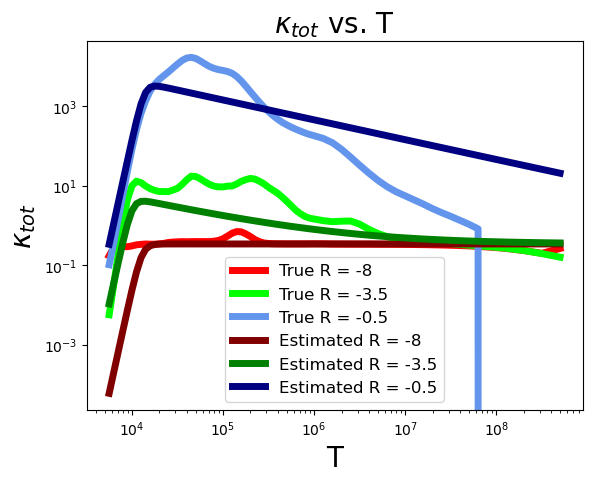

In [20]:
plt.loglog(T, op8[1:], label="True R = -8", linewidth=5, color="red")
plt.loglog(T, op35[1:], label="True R = -3.5", linewidth=5, color="lime")
plt.loglog(T, op05[1:], label="True R = -0.5", linewidth=5, color="cornflowerblue")
plt.loglog(T, ktot8, label="Estimated R = -8", linewidth=5, color="maroon")
plt.loglog(T, ktot35, label="Estimated R = -3.5", linewidth=5, color="green")
plt.loglog(T, ktot05, label="Estimated R = -0.5", linewidth=5,  color="navy")
plt.legend(fontsize=12)
plt.xlabel("T", fontsize=20)
plt.ylabel(r"$\kappa_{tot}$", fontsize=20)
plt.title(r"$\kappa_{tot}$ vs. T", fontsize=20)
plt.show()

### Problem 3a
#### Download the file stellar_profile.dat from the course website. This file contains three columns: (m/M), logT, log$\rho$ where each row corresponds to a spherical shell within a star like the sun and the three columns represent (a) the total mass interior to the shell (in units of the total star mass), (b) the log of the temperature of the shell (in Kelvin), and (c) the log of the density of the shell (in $g/cm^3$). Assume that the star has solar composition (X = 0.7, Y = 0.28, Z = 0.02) and is completely ionized.
#### Grads: compute the Rosseland mean opacity in each shell by interpolating the opacity table in two dimensions. Plot $\kappa$ as a function of mass.

Grab data

In [23]:
profile = np.genfromtxt("./stellar_profile.dat")

Separate data into its data types

In [24]:
mm = profile[:,0]
logt_prof = profile[:,1]
logrho = profile[:,2]

The reverse of the function I defined in Q2: taking rho and T and calulating an R

In [25]:
def rho_to_R(rho, T):
    R = rho/((T/1e6)**3)
    return R

Interpolation function -- finding the 4 corners that surround the square that the "ghost" data point lives in and taking the average of those four values. There seemed to be one value of R that was large and messing up indices, so I just set it to the largest possible index for the most accurate interpolation, given the data I have.

In [26]:
def interpolate(rho, T):
    R = rho_to_R(rho, T)
    Rlog = np.log10(R)
    ridx_low = np.where(Rlog>logr)[0][-1]
    if Rlog>1:
        ridx_low = 18
    ridx_high = ridx_low+1

    Tlog = np.log10(T)
    tidx_low = np.where(Tlog>logt)[0][-1]
    tidx_high = tidx_low+1

    corner1 = opacity[tidx_low,ridx_low]
    corner2 = opacity[tidx_low,ridx_high]
    corner3 = opacity[tidx_high,ridx_low]
    corner4 = opacity[tidx_high,ridx_high]

    k = np.average([corner1, corner2, corner3, corner4])
    return k

Take rho and T out of log space, because R is not defined in log space. Use these values to interpolate values for opacity from the table!

In [27]:
rho = 10**logrho
t_prof = 10**logt_prof
k = [interpolate(rho, t) for rho, t in zip(rho, t_prof)]    

Plot -- we see that opacity is highest at the surface of the star, cool!

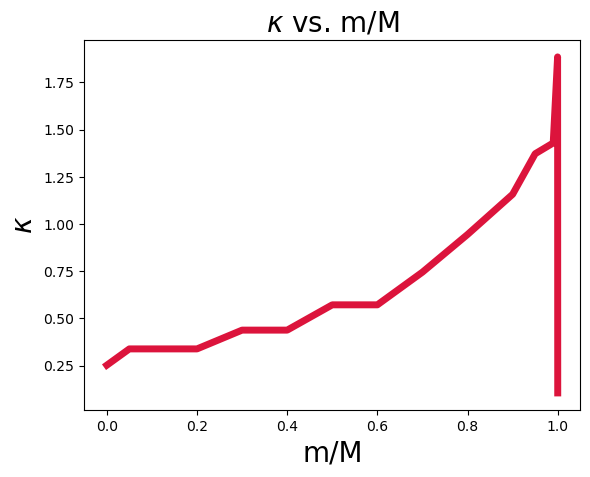

In [28]:
plt.plot(mm, k, color="crimson", linewidth=5)
plt.xlabel("m/M", fontsize=20)
plt.ylabel(r"$\kappa$", fontsize=20)
plt.title(r"$\kappa$ vs. m/M", fontsize=20)
plt.show()